In [2]:
# Using yfinance (Gold Futures GC=F)
import yfinance as yf

gold = yf.download('GC=F', start='2015-06-01',
end='2025-06-01', interval='1d')
gold = gold.reset_index()[['Date', 'Close']]
gold.to_csv('gold_10y.csv', index=False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
import pandas as pd

gold = pd.read_csv('/content/gold_10y.csv', parse_dates=['Date'])
gold['Gold_Diff'] = gold['Close'].diff()
gold_stationary = gold[['Date', 'Gold_Diff']].dropna()
gold_stationary.to_csv('gold_stationary.csv', index=False)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [5]:
import pandas as pd

gold = pd.read_csv('/content/gold_10y.csv', parse_dates=['Date'])
# Explicitly convert the 'Close' column to numeric, coercing errors to NaN
gold['Close'] = pd.to_numeric(gold['Close'], errors='coerce')
gold['Gold_Diff'] = gold['Close'].diff()
gold_stationary = gold[['Date', 'Gold_Diff']].dropna()
gold_stationary.to_csv('gold_stationary.csv', index=False)

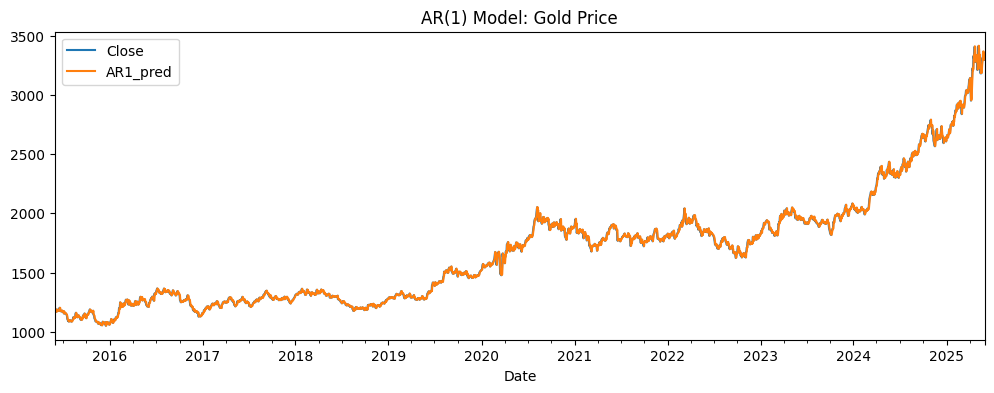

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 2610
Model:                     AutoReg(1)   Log Likelihood              -11131.751
Method:               Conditional MLE   S.D. of innovations             17.249
Date:                Sun, 01 Jun 2025   AIC                          22269.502
Time:                        04:25:32   BIC                          22287.102
Sample:                    06-02-2015   HQIC                         22275.878
                         - 05-30-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5379      1.237     -1.244      0.214      -3.962       0.886
Close.L1       1.0014      0.001   1411.739      0.000       1.000       1.003
                                    Roots           

In [7]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load gold price data
gold = pd.read_csv('gold_10y.csv', parse_dates=['Date'])
gold = gold.set_index('Date').asfreq('B') # business days frequency
gold['Close'] = pd.to_numeric(gold['Close'], errors='coerce')
gold['Close'] = gold['Close'].interpolate() # fill missing values

# Fit AR(1) model (current value regressed on previous value)
model_ar = AutoReg(gold['Close'], lags=1).fit()
gold['AR1_pred'] = model_ar.fittedvalues

# Plot results
gold[['Close', 'AR1_pred']].plot(figsize=(12,4),
title='AR(1) Model: Gold Price')
plt.show()

# Print model summary
print(model_ar.summary())

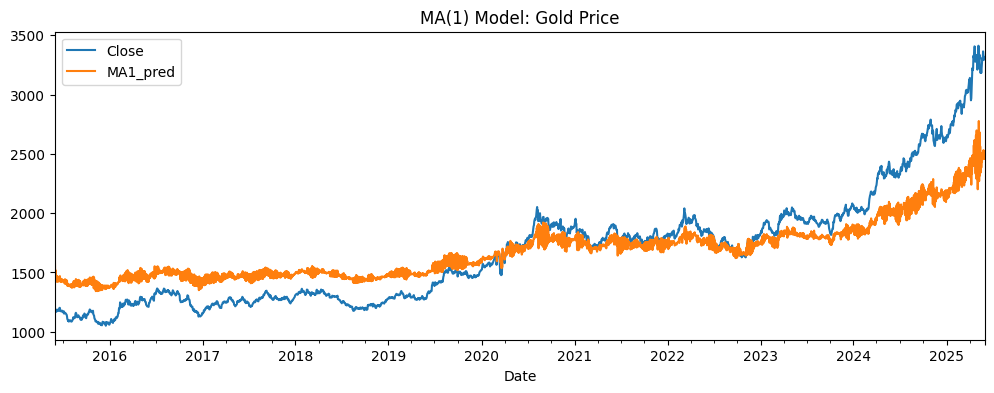

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2610
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -18052.479
Date:                Sun, 01 Jun 2025   AIC                          36110.959
Time:                        04:29:14   BIC                          36128.560
Sample:                    06-01-2015   HQIC                         36117.335
                         - 05-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1677.6850     12.098    138.672      0.000    1653.973    1701.397
ma.L1          0.9791      0.003    359.205      0.000       0.974       0.984
sigma2      5.953e+04   1628.712     36.550      0.0

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA(1) model (current value depends on current and previous error)
model_ma = ARIMA(gold['Close'], order=(0,0,1)).fit()
gold['MA1_pred'] = model_ma.fittedvalues

# Plot results
gold[['Close', 'MA1_pred']].plot(figsize=(12,4),
title='MA(1) Model: Gold Price')
plt.show()

# Print model summary
print(model_ma.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


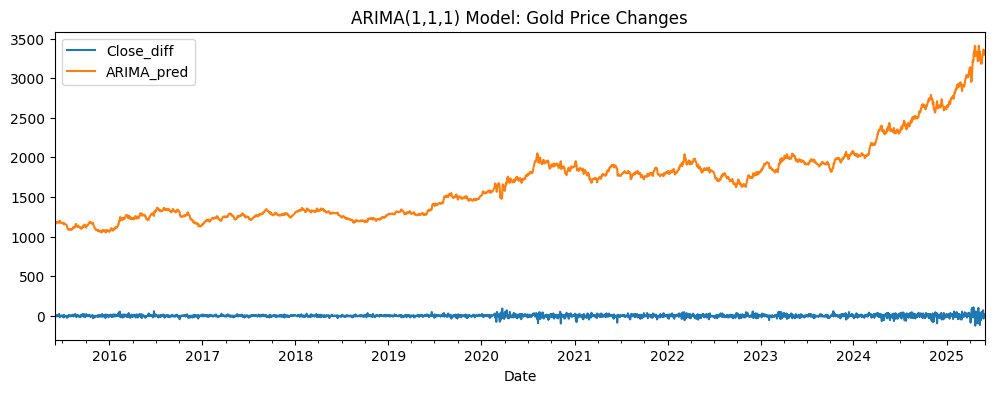

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2610
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11135.482
Date:                Sun, 01 Jun 2025   AIC                          22276.965
Time:                        04:31:15   BIC                          22294.565
Sample:                    06-01-2015   HQIC                         22283.341
                         - 05-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7248      0.169     -4.277      0.000      -1.057      -0.393
ma.L1          0.7045      0.176      4.011      0.000       0.360       1.049
sigma2       298.3688      3.898     76.537      0.0

In [9]:
# First, difference the series to remove trend (d=1)
gold['Close_diff'] = gold['Close'].diff()

# Fit ARIMA(1,1,1): AR(1) + 1 difference + MA(1)
model_arima = ARIMA(gold['Close'], order=(1,1,1)).fit()
gold['ARIMA_pred'] = model_arima.fittedvalues

# Plot differenced series and ARIMA predictions
gold[['Close_diff', 'ARIMA_pred']].dropna().plot(figsize=(12,4),title='ARIMA(1,1,1) Model: Gold Price Changes')
plt.show()

 # Print model summary
print(model_arima.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


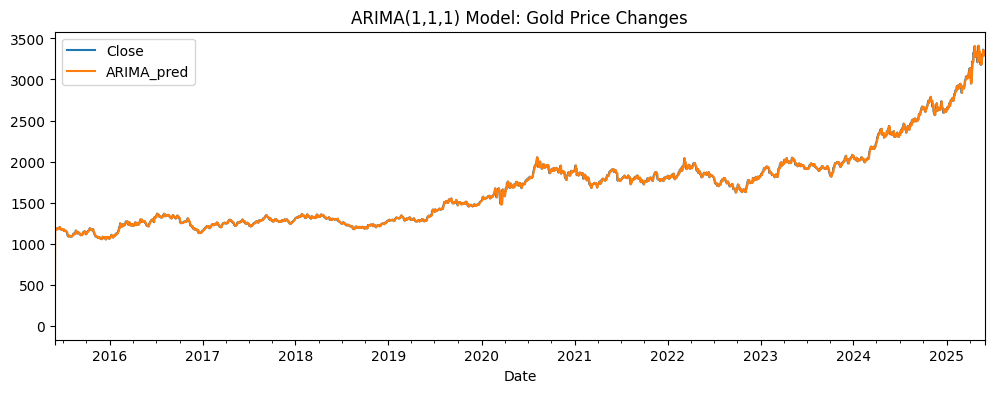

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2610
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11135.482
Date:                Sun, 01 Jun 2025   AIC                          22276.965
Time:                        04:32:18   BIC                          22294.565
Sample:                    06-01-2015   HQIC                         22283.341
                         - 05-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7248      0.169     -4.277      0.000      -1.057      -0.393
ma.L1          0.7045      0.176      4.011      0.000       0.360       1.049
sigma2       298.3688      3.898     76.537      0.0

In [10]:
# First, difference the series to remove trend (d=1)
gold['Close_diff'] = gold['Close'].diff()

# Fit ARIMA(1,1,1): AR(1) + 1 difference + MA(1)
model_arima = ARIMA(gold['Close'], order=(1,1,1)).fit()
gold['ARIMA_pred'] = model_arima.fittedvalues

# Plot differenced series and ARIMA predictions
gold[['Close', 'ARIMA_pred']].dropna().plot(figsize=(12,4),title='ARIMA(1,1,1) Model: Gold Price Changes')
plt.show()

 # Print model summary
print(model_arima.summary())

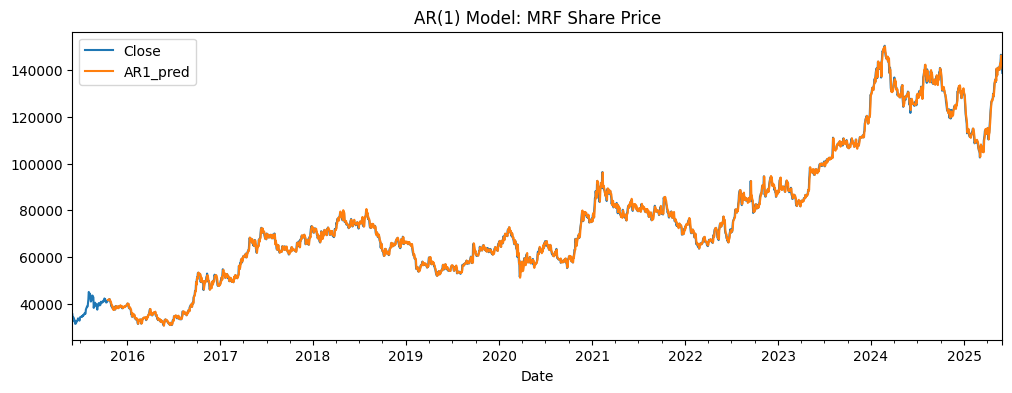

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 2610
Model:                   AutoReg(100)   Log Likelihood              -21216.289
Method:               Conditional MLE   S.D. of innovations           1134.295
Date:                Sun, 01 Jun 2025   AIC                          42636.578
Time:                        04:35:49   BIC                          43231.038
Sample:                    10-19-2015   HQIC                         42852.351
                         - 05-30-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.3432     67.899      0.903      0.366     -71.736     194.422
Close.L1       0.9885      0.020     49.498      0.000       0.949       1.028
Close.L2       0.0291      0.028      1.038      0.2

In [14]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load MRF share price data
gold = pd.read_csv('/content/mrf_10y.csv', parse_dates=['Date'])
gold = gold.set_index('Date').asfreq('B') # business days frequency
gold['Close'] = pd.to_numeric(gold['Close'], errors='coerce')
gold['Close'] = gold['Close'].interpolate() # fill missing values

# Fit AR(1) model (current value regressed on previous value)
model_ar = AutoReg(gold['Close'], lags=100).fit()
gold['AR1_pred'] = model_ar.fittedvalues

# Plot results
gold[['Close', 'AR1_pred']].plot(figsize=(12,4),
title='AR(1) Model: MRF Share Price')
plt.show()

# Print model summary
print(model_ar.summary())

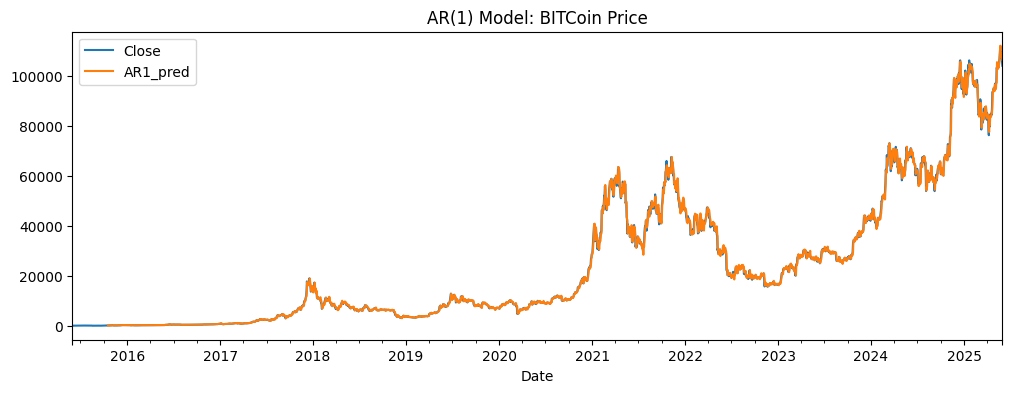

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 2610
Model:                   AutoReg(100)   Log Likelihood              -21408.632
Method:               Conditional MLE   S.D. of innovations           1224.634
Date:                Sun, 01 Jun 2025   AIC                          43021.264
Time:                        04:37:31   BIC                          43615.724
Sample:                    10-19-2015   HQIC                         43237.037
                         - 05-30-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8979     34.179      0.670      0.503     -44.091      89.887
Close.L1       0.9373      0.020     46.917      0.000       0.898       0.976
Close.L2       0.0668      0.027      2.441      0.0

In [15]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load BitCoin price data
gold = pd.read_csv('/content/btc_10y.csv', parse_dates=['Date'])
gold = gold.set_index('Date').asfreq('B') # business days frequency
gold['Close'] = pd.to_numeric(gold['Close'], errors='coerce')
gold['Close'] = gold['Close'].interpolate() # fill missing values

# Fit AR(1) model (current value regressed on previous value)
model_ar = AutoReg(gold['Close'], lags=100).fit()
gold['AR1_pred'] = model_ar.fittedvalues

# Plot results
gold[['Close', 'AR1_pred']].plot(figsize=(12,4),
title='AR(1) Model: BITCoin Price')
plt.show()

# Print model summary
print(model_ar.summary())

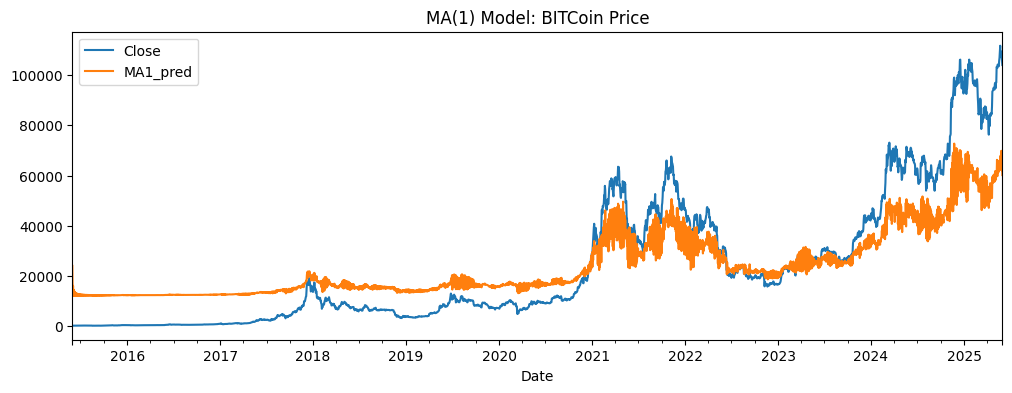

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2610
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -28540.677
Date:                Sun, 01 Jun 2025   AIC                          57087.354
Time:                        04:39:01   BIC                          57104.956
Sample:                    06-01-2015   HQIC                         57093.731
                         - 05-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.403e+04    525.392     45.728      0.000     2.3e+04    2.51e+04
ma.L1          0.9725      0.003    319.408      0.000       0.966       0.978
sigma2      1.842e+08      0.051   3.61e+09      0.0

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA(1) model (current value depends on current and previous error)
model_ma = ARIMA(gold['Close'], order=(0,0,1)).fit()
gold['MA1_pred'] = model_ma.fittedvalues

# Plot results
gold[['Close', 'MA1_pred']].plot(figsize=(12,4),
title='MA(1) Model: BITCoin Price')
plt.show()

# Print model summary
print(model_ma.summary())

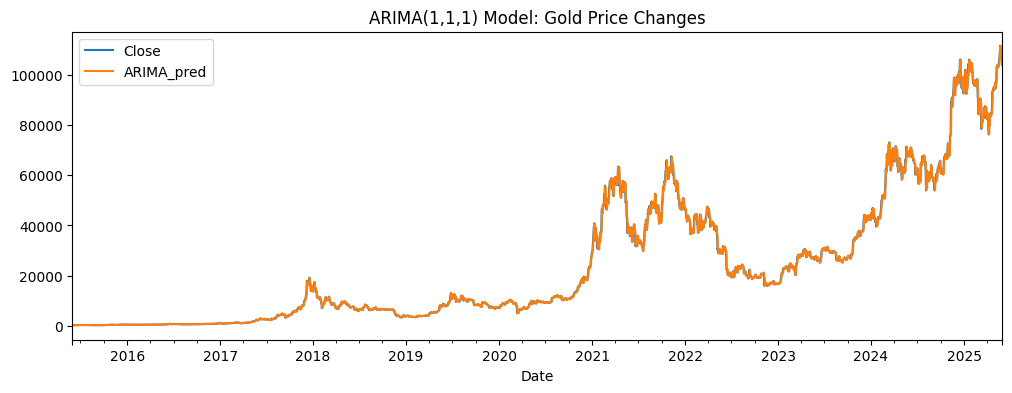

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2610
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22327.922
Date:                Sun, 01 Jun 2025   AIC                          44661.843
Time:                        04:39:52   BIC                          44679.443
Sample:                    06-01-2015   HQIC                         44668.219
                         - 05-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1148      0.229     -0.500      0.617      -0.564       0.335
ma.L1          0.0668      0.229      0.291      0.771      -0.383       0.517
sigma2      1.591e+06   1.72e+04     92.631      0.0

In [18]:
# First, difference the series to remove trend (d=1)
gold['Close_diff'] = gold['Close'].diff()

# Fit ARIMA(1,1,1): AR(1) + 1 difference + MA(1)
model_arima = ARIMA(gold['Close'], order=(1,1,1)).fit()
gold['ARIMA_pred'] = model_arima.fittedvalues

# Plot differenced series and ARIMA predictions
gold[['Close', 'ARIMA_pred']].dropna().plot(figsize=(12,4),title='ARIMA(1,1,1) Model: Gold Price Changes')
plt.show()

 # Print model summary
print(model_arima.summary())